In [2]:
import netCDF4 as nc4
import numpy as np
from matplotlib import pyplot as plt
import copy
import pandas as pd
import time
# import xarray as xr

### Read in climate and extract the corresponding time series

In [1]:
# Data path
# AD-spinup history [0001 - 0200]
fad = 'fates.test_site.ad_spinup.0001_0200.nc'
fad1 = 'fates.test_sla.ad_spinup.0001_0200.nc'
fad2 = 'fates.test_cstarv.ad_spinup.0001_0200.nc'
fad3 = 'fates.test_cstarv_thresh.ad_spinup.0001_0200.nc'
fad4 = 'fates.test_leaf_tao.ad_spinup.0001_0200.nc'

# Normal-spinup history [1850 - 1949] 
fsp = 'fates.test_site.1850_1920.nc'

# Logging activity history [after 1950]
flg = 'fates.test_site.1950_2015.nc'

In [3]:
# start = time.time()

dtc = nc4.Dataset(fad)
dgpp = dtc['FATES_GPP'][:]
dnpp = dtc['FATES_NPP'][:]
dgpp_pf = dtc['FATES_GPP_PF'][:]
dnpp_pf = dtc['FATES_NPP_PF'][:]
drh = dtc['HR'][:]
dvegc = dtc['FATES_VEGC'][:]
# Components of vegetation C
dleafc_pf = dtc['FATES_LEAFC_PF'][:]
dstorec_pf = dtc['FATES_STOREC_PF'][:]
dvegc_pf = dtc['FATES_VEGC_PF'][:]
dnp_pf = dtc['FATES_NPLANT_PF'][:]
dsoilc = dtc['SOILC'][:]
# dmort_age = dtc['FATES_MORTALITY_AGESCEN_SZ'][:]
# dmort_bg = dtc['FATES_MORTALITY_BACKGROUND_SZ'][:]
dmort_tot = dtc['FATES_MORTALITY_CFLUX_PF'][:]
# dmort_tot = dtc['FATES_MORTALITY_CANOPY_SZPF'][:]
dmort_cst = dtc['FATES_MORTALITY_CSTARV_CFLUX_PF'][:]
# dmort_cst = dtc['FATES_MORTALITY_CSTARV_SZPF'][:]
dmort_fire = dtc['FATES_MORTALITY_FIRE_CFLUX_PF'][:]
# dmort_freeze = dtc['FATES_MORTALITY_FREEZING_SZ'][:]
dmort_hyd = dtc['FATES_MORTALITY_HYDRO_CFLUX_PF'][:]
# dmort_imp = dtc['FATES_MORTALITY_IMPACT_SZ'][:]
# dmort_sen = dtc['FATES_MORTALITY_SENESCENCE_SZ'][:]
# dmort_term = dtc['FATES_MORTALITY_TERMINATION_SZ'][:]
dmort_term = dtc['FATES_MORTALITY_TERMINATION_SZPF'][:]
drec = dtc['FATES_RECRUITMENT_PF'][:]
dtc.close()



In [34]:
dtc = nc4.Dataset(fad1)
dgpp_sla = dtc['FATES_GPP'][:]
dnpp_sla = dtc['FATES_NPP'][:]
dgpp_pf_sla = dtc['FATES_GPP_PF'][:]
dnpp_pf_sla = dtc['FATES_NPP_PF'][:]
drh_sla = dtc['HR'][:]
dvegc_sla = dtc['FATES_VEGC'][:]
# Components of vegetation C
dleafc_pf_sla = dtc['FATES_LEAFC_PF'][:]
dstorec_pf_sla = dtc['FATES_STOREC_PF'][:]
dvegc_pf_sla = dtc['FATES_VEGC_PF'][:]
dnp_pf_sla = dtc['FATES_NPLANT_PF'][:]
dsoilc_sla = dtc['SOILC'][:]
# dmort_age_sla = dtc['FATES_MORTALITY_AGESCEN_SZ'][:]
# dmort_bg_sla = dtc['FATES_MORTALITY_BACKGROUND_SZ'][:]
dmort_tot_sla = dtc['FATES_MORTALITY_CANOPY_SZPF'][:]
# dmort_cst_sla = dtc['FATES_MORTALITY_CSTARV_CFLUX_PF'][:]
dmort_cst_sla = dtc['FATES_MORTALITY_CSTARV_SZPF'][:]
dmort_fire_sla = dtc['FATES_MORTALITY_FIRE_CFLUX_PF'][:]
# dmort_freeze_sla = dtc['FATES_MORTALITY_FREEZING_SZ'][:]
dmort_hyd_sla = dtc['FATES_MORTALITY_HYDRO_CFLUX_PF'][:]
# dmort_imp_sla = dtc['FATES_MORTALITY_IMPACT_SZ'][:]
# dmort_sen_sla = dtc['FATES_MORTALITY_SENESCENCE_SZ'][:]
# dmort_term_sla = dtc['FATES_MORTALITY_TERMINATION_SZ'][:]
dmort_term_sla = dtc['FATES_MORTALITY_TERMINATION_SZPF'][:]
drec_sla = dtc['FATES_RECRUITMENT_PF'][:]
dtc.close()

dtc = nc4.Dataset(fad2)
dgpp_cstarv = dtc['FATES_GPP'][:]
dnpp_cstarv = dtc['FATES_NPP'][:]
dgpp_pf_cstarv = dtc['FATES_GPP_PF'][:]
dnpp_pf_cstarv = dtc['FATES_NPP_PF'][:]
drh_cstarv = dtc['HR'][:]
dvegc_cstarv = dtc['FATES_VEGC'][:]
# Components of vegetation C
dleafc_pf_cstarv = dtc['FATES_LEAFC_PF'][:]
dstorec_pf_cstarv = dtc['FATES_STOREC_PF'][:]
dvegc_pf_cstarv = dtc['FATES_VEGC_PF'][:]
dnp_pf_cstarv = dtc['FATES_NPLANT_PF'][:]
dsoilc_cstarv = dtc['SOILC'][:]
# dmort_age_cstarv = dtc['FATES_MORTALITY_AGESCEN_SZ'][:]
# dmort_bg_cstarv = dtc['FATES_MORTALITY_BACKGROUND_SZ'][:]
dmort_tot_cstarv = dtc['FATES_MORTALITY_CANOPY_SZPF'][:]
# dmort_cst_cstarv = dtc['FATES_MORTALITY_CSTARV_CFLUX_PF'][:]
dmort_cst_cstarv = dtc['FATES_MORTALITY_CSTARV_SZPF'][:]
dmort_fire_cstarv = dtc['FATES_MORTALITY_FIRE_CFLUX_PF'][:]
# dmort_freeze_cstarv = dtc['FATES_MORTALITY_FREEZING_SZ'][:]
dmort_hyd_cstarv = dtc['FATES_MORTALITY_HYDRO_CFLUX_PF'][:]
# dmort_imp_cstarv = dtc['FATES_MORTALITY_IMPACT_SZ'][:]
# dmort_sen_cstarv = dtc['FATES_MORTALITY_SENESCENCE_SZ'][:]
# dmort_term_cstarv = dtc['FATES_MORTALITY_TERMINATION_SZ'][:]
dmort_term_cstarv = dtc['FATES_MORTALITY_TERMINATION_SZPF'][:]
drec_cstarv = dtc['FATES_RECRUITMENT_PF'][:]
dtc.close()

dtc = nc4.Dataset(fad3)
dgpp_cstarv_thresh = dtc['FATES_GPP'][:]
dnpp_cstarv_thresh = dtc['FATES_NPP'][:]
dgpp_pf_cstarv_thresh = dtc['FATES_GPP_PF'][:]
dnpp_pf_cstarv_thresh = dtc['FATES_NPP_PF'][:]
drh_cstarv_thresh = dtc['HR'][:]
dvegc_cstarv_thresh = dtc['FATES_VEGC'][:]
# Components of vegetation C
dleafc_pf_cstarv_thresh = dtc['FATES_LEAFC_PF'][:]
dstorec_pf_cstarv_thresh = dtc['FATES_STOREC_PF'][:]
dvegc_pf_cstarv_thresh = dtc['FATES_VEGC_PF'][:]
dnp_pf_cstarv_thresh = dtc['FATES_NPLANT_PF'][:]
dsoilc_cstarv_thresh = dtc['SOILC'][:]
# dmort_age_cstarv_thresh = dtc['FATES_MORTALITY_AGESCEN_SZ'][:]
# dmort_bg_cstarv_thresh = dtc['FATES_MORTALITY_BACKGROUND_SZ'][:]
dmort_tot_cstarv_thresh = dtc['FATES_MORTALITY_CANOPY_SZPF'][:]
# dmort_cst_cstarv_thresh = dtc['FATES_MORTALITY_CSTARV_CFLUX_PF'][:]
dmort_cst_cstarv_thresh = dtc['FATES_MORTALITY_CSTARV_SZPF'][:]
dmort_fire_cstarv_thresh = dtc['FATES_MORTALITY_FIRE_CFLUX_PF'][:]
# dmort_freeze_cstarv_thresh = dtc['FATES_MORTALITY_FREEZING_SZ'][:]
dmort_hyd_cstarv_thresh = dtc['FATES_MORTALITY_HYDRO_CFLUX_PF'][:]
# dmort_imp_cstarv_thresh = dtc['FATES_MORTALITY_IMPACT_SZ'][:]
# dmort_sen_cstarv_thresh = dtc['FATES_MORTALITY_SENESCENCE_SZ'][:]
# dmort_term_cstarv_thresh = dtc['FATES_MORTALITY_TERMINATION_SZ'][:]
dmort_term_cstarv_thresh = dtc['FATES_MORTALITY_TERMINATION_SZPF'][:]
drec_cstarv_thresh = dtc['FATES_RECRUITMENT_PF'][:]
dtc.close()

dtc = nc4.Dataset(fad4)
dgpp_leaf_tao = dtc['FATES_GPP'][:]
dnpp_leaf_tao = dtc['FATES_NPP'][:]
dgpp_pf_leaf_tao = dtc['FATES_GPP_PF'][:]
dnpp_pf_leaf_tao = dtc['FATES_NPP_PF'][:]
drh_leaf_tao = dtc['HR'][:]
dvegc_leaf_tao = dtc['FATES_VEGC'][:]
# Components of vegetation C
dleafc_pf_leaf_tao = dtc['FATES_LEAFC_PF'][:]
dstorec_pf_leaf_tao = dtc['FATES_STOREC_PF'][:]
dvegc_pf_leaf_tao = dtc['FATES_VEGC_PF'][:]
dnp_pf_leaf_tao = dtc['FATES_NPLANT_PF'][:]
dsoilc_leaf_tao = dtc['SOILC'][:]
# dmort_age_leaf_tao = dtc['FATES_MORTALITY_AGESCEN_SZ'][:]
# dmort_bg_leaf_tao = dtc['FATES_MORTALITY_BACKGROUND_SZ'][:]
dmort_tot_leaf_tao = dtc['FATES_MORTALITY_CANOPY_SZPF'][:]
# dmort_cst_leaf_tao = dtc['FATES_MORTALITY_CSTARV_CFLUX_PF'][:]
dmort_cst_leaf_tao = dtc['FATES_MORTALITY_CSTARV_SZPF'][:]
dmort_fire_leaf_tao = dtc['FATES_MORTALITY_FIRE_CFLUX_PF'][:]
# dmort_freeze_leaf_tao = dtc['FATES_MORTALITY_FREEZING_SZ'][:]
dmort_hyd_leaf_tao = dtc['FATES_MORTALITY_HYDRO_CFLUX_PF'][:]
# dmort_imp_leaf_tao = dtc['FATES_MORTALITY_IMPACT_SZ'][:]
# dmort_sen_leaf_tao = dtc['FATES_MORTALITY_SENESCENCE_SZ'][:]
# dmort_term_leaf_tao = dtc['FATES_MORTALITY_TERMINATION_SZ'][:]
dmort_term_leaf_tao = dtc['FATES_MORTALITY_TERMINATION_SZPF'][:]
drec_leaf_tao = dtc['FATES_RECRUITMENT_PF'][:]
dtc.close()

In [5]:
# Convert GPP from day to year
dgpp_pf_yr = np.zeros((200,2))
dnpp_pf_yr = np.zeros((200,2))
dgpp_yr = np.zeros((200))
dnpp_yr = np.zeros((200))
drh_yr = np.zeros((200))
dvegc_yr = np.zeros((200))
dvegc_pf_yr = np.zeros((200,2))
dleafc_pf_yr = np.zeros((200,2))
dstorec_pf_yr = np.zeros((200,2))
dsoilc_yr = np.zeros((200))
dnp_pf_yr = np.zeros((200, 2))
# dmort_age_yr = np.zeros((200))
# dmort_bg_yr = np.zeros((200))
dmort_tot_yr = np.zeros((200, 2))
dmort_cst_yr = np.zeros((200, 2))
dmort_fire_yr = np.zeros((200, 2))
# dmort_freeze_yr = np.zeros((200))
dmort_hyd_yr = np.zeros((200, 2))
# dmort_imp_yr = np.zeros((200))
# dmort_sen_yr = np.zeros((200))
dmort_term_yr = np.zeros((200,2))
drec_yr = np.zeros((200,2))

dgpp_pf_yr_sla = np.zeros((200,2))
dnpp_pf_yr_sla = np.zeros((200,2))
dgpp_yr_sla = np.zeros((200))
dnpp_yr_sla = np.zeros((200))
drh_yr_sla = np.zeros((200))
dvegc_yr_sla = np.zeros((200))
dvegc_pf_yr_sla = np.zeros((200,2))
dleafc_pf_yr_sla = np.zeros((200,2))
dstorec_pf_yr_sla = np.zeros((200,2))
dsoilc_yr_sla = np.zeros((200))
dnp_pf_yr_sla = np.zeros((200, 2))
dmort_tot_yr_sla = np.zeros((200, 2))
dmort_cst_yr_sla = np.zeros((200, 2))
dmort_fire_yr_sla = np.zeros((200, 2))
dmort_hyd_yr_sla = np.zeros((200, 2))
dmort_term_yr_sla = np.zeros((200,2))
drec_yr_sla = np.zeros((200,2))

dgpp_pf_yr_cstarv = np.zeros((200,2))
dnpp_pf_yr_cstarv = np.zeros((200,2))
dgpp_yr_cstarv = np.zeros((200))
dnpp_yr_cstarv = np.zeros((200))
drh_yr_cstarv = np.zeros((200))
dvegc_yr_cstarv = np.zeros((200))
dvegc_pf_yr_cstarv = np.zeros((200,2))
dleafc_pf_yr_cstarv = np.zeros((200,2))
dstorec_pf_yr_cstarv = np.zeros((200,2))
dsoilc_yr_cstarv = np.zeros((200))
dnp_pf_yr_cstarv = np.zeros((200, 2))
dmort_tot_yr_cstarv = np.zeros((200, 2))
dmort_cst_yr_cstarv = np.zeros((200, 2))
dmort_fire_yr_cstarv = np.zeros((200, 2))
dmort_hyd_yr_cstarv = np.zeros((200, 2))
dmort_term_yr_cstarv = np.zeros((200,2))
drec_yr_cstarv = np.zeros((200,2))

dgpp_pf_yr_cstarv_thresh = np.zeros((200,2))
dnpp_pf_yr_cstarv_thresh = np.zeros((200,2))
dgpp_yr_cstarv_thresh = np.zeros((200))
dnpp_yr_cstarv_thresh = np.zeros((200))
drh_yr_cstarv_thresh = np.zeros((200))
dvegc_yr_cstarv_thresh = np.zeros((200))
dvegc_pf_yr_cstarv_thresh = np.zeros((200,2))
dleafc_pf_yr_cstarv_thresh = np.zeros((200,2))
dstorec_pf_yr_cstarv_thresh = np.zeros((200,2))
dsoilc_yr_cstarv_thresh = np.zeros((200))
dnp_pf_yr_cstarv_thresh = np.zeros((200, 2))
dmort_tot_yr_cstarv_thresh = np.zeros((200, 2))
dmort_cst_yr_cstarv_thresh = np.zeros((200, 2))
dmort_fire_yr_cstarv_thresh = np.zeros((200, 2))
dmort_hyd_yr_cstarv_thresh = np.zeros((200, 2))
dmort_term_yr_cstarv_thresh = np.zeros((200,2))
drec_yr_cstarv_thresh = np.zeros((200,2))

dgpp_pf_yr_leaf_tao = np.zeros((200,2))
dnpp_pf_yr_leaf_tao = np.zeros((200,2))
dgpp_yr_leaf_tao = np.zeros((200))
dnpp_yr_leaf_tao = np.zeros((200))
drh_yr_leaf_tao = np.zeros((200))
dvegc_yr_leaf_tao = np.zeros((200))
dvegc_pf_yr_leaf_tao = np.zeros((200,2))
dleafc_pf_yr_leaf_tao = np.zeros((200,2))
dstorec_pf_yr_leaf_tao = np.zeros((200,2))
dsoilc_yr_leaf_tao = np.zeros((200))
dnp_pf_yr_leaf_tao = np.zeros((200, 2))
dmort_tot_yr_leaf_tao = np.zeros((200, 2))
dmort_cst_yr_leaf_tao = np.zeros((200, 2))
dmort_fire_yr_leaf_tao = np.zeros((200, 2))
dmort_hyd_yr_leaf_tao = np.zeros((200, 2))
dmort_term_yr_leaf_tao = np.zeros((200,2))
drec_yr_leaf_tao = np.zeros((200,2))

for i in np.arange(0,200):
    dgpp_pf_yr[i,0] = np.nanmean(dgpp_pf[12*i:12*i+12,0,0])*3600.0*24.0*365.0
    dgpp_pf_yr[i,1] = np.nanmean(dgpp_pf[12*i:12*i+12,1,0])*3600.0*24.0*365.0
    dnpp_pf_yr[i,0] = np.nanmean(dnpp_pf[12*i:12*i+12,0,0])*3600.0*24.0*365.0
    dnpp_pf_yr[i,1] = np.nanmean(dnpp_pf[12*i:12*i+12,1,0])*3600.0*24.0*365.0
    dgpp_yr[i] = np.nanmean(dgpp[12*i:12*i+12])*3600.0*24.0*365.0
    dnpp_yr[i] = np.nanmean(dnpp[12*i:12*i+12])*3600.0*24.0*365.0
    drh_yr[i] = np.nanmean(drh[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3
    dnp_pf_yr[i, 0] = np.nanmean(dnp_pf[12*i:12*i+12,0,0])
    dnp_pf_yr[i, 1] = np.nanmean(dnp_pf[12*i:12*i+12,1,0])
    dvegc_pf_yr[i, 0] = np.nanmean(dvegc_pf[12*i:12*i+12,0,0])
    dvegc_pf_yr[i, 1] = np.nanmean(dvegc_pf[12*i:12*i+12,1,0])
    dleafc_pf_yr[i, 0] = np.nanmean(dleafc_pf[12*i:12*i+12,0,0])
    dleafc_pf_yr[i, 1] = np.nanmean(dleafc_pf[12*i:12*i+12,1,0])
    dstorec_pf_yr[i, 0] = np.nanmean(dstorec_pf[12*i:12*i+12,0,0])
    dstorec_pf_yr[i, 1] = np.nanmean(dstorec_pf[12*i:12*i+12,1,0])
#     dmort_age_yr[i] = np.nansum(np.nanmean(dmort_age[12*i:12*i+12,0,0], 0))
#     dmort_bg_yr[i] = np.nansum(np.nanmean(dmort_bg[12*i:12*i+12,0,0], 0))
    dmort_tot_yr[i,0] = np.nansum(np.nanmean(dmort_tot[12*i:12*i+12,0:12,0], 0))
    dmort_tot_yr[i,1] = np.nansum(np.nanmean(dmort_tot[12*i:12*i+12,13:26,0], 0))

    dmort_cst_yr[i,0] = np.nansum(np.nanmean(dmort_cst[12*i:12*i+12,0:12,0], 0))
    dmort_cst_yr[i,1] = np.nansum(np.nanmean(dmort_cst[12*i:12*i+12,13:26,0], 0))

    dmort_fire_yr[i,0] = np.nansum(np.nanmean(dmort_fire[12*i:12*i+12,0,0], 0))
    dmort_fire_yr[i,1] = np.nansum(np.nanmean(dmort_fire[12*i:12*i+12,1,0], 0))
#     dmort_freeze_yr[i] = np.nansum(np.nanmean(dmort_freeze[12*i:12*i+12,0,0], 0))
    dmort_hyd_yr[i,0] = np.nansum(np.nanmean(dmort_hyd[12*i:12*i+12,0,0], 0))
    dmort_hyd_yr[i,1] = np.nansum(np.nanmean(dmort_hyd[12*i:12*i+12,1,0], 0))
#     dmort_imp_yr[i] = np.nansum(np.nanmean(dmort_imp[12*i:12*i+12,0,0], 0))
#     dmort_sen_yr[i] = np.nansum(np.nanmean(dmort_sen[12*i:12*i+12,0,0], 0))
    dmort_term_yr[i,0] = np.nansum(np.nanmean(dmort_term[12*i:12*i+12,0:12,0], 0))
    dmort_term_yr[i,1] = np.nansum(np.nanmean(dmort_term[12*i:12*i+12,13:26,0], 0))
    drec_yr[i,0] = np.nansum(np.nanmean(drec[12*i:12*i+12,0,0], 0))
    drec_yr[i,1] = np.nansum(np.nanmean(drec[12*i:12*i+12,1,0], 0))
    
#     dgpp_pf_yr_sla[i,0] = np.nanmean(dgpp_pf_sla[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dgpp_pf_yr_sla[i,1] = np.nanmean(dgpp_pf_sla[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_sla[i,0] = np.nanmean(dnpp_pf_sla[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_sla[i,1] = np.nanmean(dnpp_pf_sla[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dgpp_yr_sla[i] = np.nanmean(dgpp_sla[12*i:12*i+12])*3600.0*24.0*365.0
#     dnpp_yr_sla[i] = np.nanmean(dnpp_sla[12*i:12*i+12])*3600.0*24.0*365.0
#     drh_yr_sla[i] = np.nanmean(drh_sla[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
#     dvegc_yr_sla[i] = np.nanmean(dvegc_sla[12*i:12*i+12])
#     dsoilc_yr_sla[i] = np.nanmean(dsoilc_sla[12*i:12*i+12])*1e-3
#     dnp_pf_yr_sla[i, 0] = np.nanmean(dnp_pf_sla[12*i:12*i+12,0,0])
#     dnp_pf_yr_sla[i, 1] = np.nanmean(dnp_pf_sla[12*i:12*i+12,1,0])
#     dvegc_pf_yr_sla[i, 0] = np.nanmean(dvegc_pf_sla[12*i:12*i+12,0,0])
#     dvegc_pf_yr_sla[i, 1] = np.nanmean(dvegc_pf_sla[12*i:12*i+12,1,0])
#     dleafc_pf_yr_sla[i, 0] = np.nanmean(dleafc_pf_sla[12*i:12*i+12,0,0])
#     dleafc_pf_yr_sla[i, 1] = np.nanmean(dleafc_pf_sla[12*i:12*i+12,1,0])
#     dstorec_pf_yr_sla[i, 0] = np.nanmean(dstorec_pf_sla[12*i:12*i+12,0,0])
#     dstorec_pf_yr_sla[i, 1] = np.nanmean(dstorec_pf_sla[12*i:12*i+12,1,0])
#     dmort_tot_yr_sla[i,0] = np.nansum(np.nanmean(dmort_tot_sla[12*i:12*i+12,0:12,0], 0))
#     dmort_tot_yr_sla[i,1] = np.nansum(np.nanmean(dmort_tot_sla[12*i:12*i+12,13:26,0], 0))
#     dmort_cst_yr_sla[i,0] = np.nansum(np.nanmean(dmort_cst_sla[12*i:12*i+12,0:12,0], 0))
#     dmort_cst_yr_sla[i,1] = np.nansum(np.nanmean(dmort_cst_sla[12*i:12*i+12,13:26,0], 0))
#     dmort_fire_yr_sla[i,0] = np.nansum(np.nanmean(dmort_fire_sla[12*i:12*i+12,0,0], 0))
#     dmort_fire_yr_sla[i,1] = np.nansum(np.nanmean(dmort_fire_sla[12*i:12*i+12,1,0], 0))
#     dmort_hyd_yr_sla[i,0] = np.nansum(np.nanmean(dmort_hyd_sla[12*i:12*i+12,0,0], 0))
#     dmort_hyd_yr_sla[i,1] = np.nansum(np.nanmean(dmort_hyd_sla[12*i:12*i+12,1,0], 0))
#     dmort_term_yr_sla[i,0] = np.nansum(np.nanmean(dmort_term_sla[12*i:12*i+12,0:12,0], 0))
#     dmort_term_yr_sla[i,1] = np.nansum(np.nanmean(dmort_term_sla[12*i:12*i+12,13:26,0], 0))
#     drec_yr_sla[i,0] = np.nansum(np.nanmean(drec_sla[12*i:12*i+12,0,0], 0))
#     drec_yr_sla[i,1] = np.nansum(np.nanmean(drec_sla[12*i:12*i+12,1,0], 0))
    
#     dgpp_pf_yr_cstarv[i,0] = np.nanmean(dgpp_pf_cstarv[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dgpp_pf_yr_cstarv[i,1] = np.nanmean(dgpp_pf_cstarv[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_cstarv[i,0] = np.nanmean(dnpp_pf_cstarv[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_cstarv[i,1] = np.nanmean(dnpp_pf_cstarv[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dgpp_yr_cstarv[i] = np.nanmean(dgpp_cstarv[12*i:12*i+12])*3600.0*24.0*365.0
#     dnpp_yr_cstarv[i] = np.nanmean(dnpp_cstarv[12*i:12*i+12])*3600.0*24.0*365.0
#     drh_yr_cstarv[i] = np.nanmean(drh_cstarv[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
#     dvegc_yr_cstarv[i] = np.nanmean(dvegc_cstarv[12*i:12*i+12])
#     dsoilc_yr_cstarv[i] = np.nanmean(dsoilc_cstarv[12*i:12*i+12])*1e-3
#     dnp_pf_yr_cstarv[i, 0] = np.nanmean(dnp_pf_cstarv[12*i:12*i+12,0,0])
#     dnp_pf_yr_cstarv[i, 1] = np.nanmean(dnp_pf_cstarv[12*i:12*i+12,1,0])
#     dvegc_pf_yr_cstarv[i, 0] = np.nanmean(dvegc_pf_cstarv[12*i:12*i+12,0,0])
#     dvegc_pf_yr_cstarv[i, 1] = np.nanmean(dvegc_pf_cstarv[12*i:12*i+12,1,0])
#     dleafc_pf_yr_cstarv[i, 0] = np.nanmean(dleafc_pf_cstarv[12*i:12*i+12,0,0])
#     dleafc_pf_yr_cstarv[i, 1] = np.nanmean(dleafc_pf_cstarv[12*i:12*i+12,1,0])
#     dstorec_pf_yr_cstarv[i, 0] = np.nanmean(dstorec_pf_cstarv[12*i:12*i+12,0,0])
#     dstorec_pf_yr_cstarv[i, 1] = np.nanmean(dstorec_pf_cstarv[12*i:12*i+12,1,0])
#     dmort_tot_yr_cstarv[i,0] = np.nansum(np.nanmean(dmort_tot_cstarv[12*i:12*i+12,0:12,0], 0))
#     dmort_tot_yr_cstarv[i,1] = np.nansum(np.nanmean(dmort_tot_cstarv[12*i:12*i+12,13:26,0], 0))
#     dmort_cst_yr_cstarv[i,0] = np.nansum(np.nanmean(dmort_cst_cstarv[12*i:12*i+12,0:12,0], 0))
#     dmort_cst_yr_cstarv[i,1] = np.nansum(np.nanmean(dmort_cst_cstarv[12*i:12*i+12,13:26,0], 0))
#     dmort_fire_yr_cstarv[i,0] = np.nansum(np.nanmean(dmort_fire_cstarv[12*i:12*i+12,0,0], 0))
#     dmort_fire_yr_cstarv[i,1] = np.nansum(np.nanmean(dmort_fire_cstarv[12*i:12*i+12,1,0], 0))
#     dmort_hyd_yr_cstarv[i,0] = np.nansum(np.nanmean(dmort_hyd_cstarv[12*i:12*i+12,0,0], 0))
#     dmort_hyd_yr_cstarv[i,1] = np.nansum(np.nanmean(dmort_hyd_cstarv[12*i:12*i+12,1,0], 0))
#     dmort_term_yr_cstarv[i,0] = np.nansum(np.nanmean(dmort_term_cstarv[12*i:12*i+12,0:12,0], 0))
#     dmort_term_yr_cstarv[i,1] = np.nansum(np.nanmean(dmort_term_cstarv[12*i:12*i+12,13:26,0], 0))
#     drec_yr_cstarv[i,0] = np.nansum(np.nanmean(drec_cstarv[12*i:12*i+12,0,0], 0))
#     drec_yr_cstarv[i,1] = np.nansum(np.nanmean(drec_cstarv[12*i:12*i+12,1,0], 0))
    
#     dgpp_pf_yr_cstarv_thresh[i,0] = np.nanmean(dgpp_pf_cstarv_thresh[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dgpp_pf_yr_cstarv_thresh[i,1] = np.nanmean(dgpp_pf_cstarv_thresh[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_cstarv_thresh[i,0] = np.nanmean(dnpp_pf_cstarv_thresh[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_cstarv_thresh[i,1] = np.nanmean(dnpp_pf_cstarv_thresh[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dgpp_yr_cstarv_thresh[i] = np.nanmean(dgpp_cstarv_thresh[12*i:12*i+12])*3600.0*24.0*365.0
#     dnpp_yr_cstarv_thresh[i] = np.nanmean(dnpp_cstarv_thresh[12*i:12*i+12])*3600.0*24.0*365.0
#     drh_yr_cstarv_thresh[i] = np.nanmean(drh_cstarv_thresh[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
#     dvegc_yr_cstarv_thresh[i] = np.nanmean(dvegc_cstarv_thresh[12*i:12*i+12])
#     dsoilc_yr_cstarv_thresh[i] = np.nanmean(dsoilc_cstarv_thresh[12*i:12*i+12])*1e-3
#     dnp_pf_yr_cstarv_thresh[i, 0] = np.nanmean(dnp_pf_cstarv_thresh[12*i:12*i+12,0,0])
#     dnp_pf_yr_cstarv_thresh[i, 1] = np.nanmean(dnp_pf_cstarv_thresh[12*i:12*i+12,1,0])
#     dvegc_pf_yr_cstarv_thresh[i, 0] = np.nanmean(dvegc_pf_cstarv_thresh[12*i:12*i+12,0,0])
#     dvegc_pf_yr_cstarv_thresh[i, 1] = np.nanmean(dvegc_pf_cstarv_thresh[12*i:12*i+12,1,0])
#     dleafc_pf_yr_cstarv_thresh[i, 0] = np.nanmean(dleafc_pf_cstarv_thresh[12*i:12*i+12,0,0])
#     dleafc_pf_yr_cstarv_thresh[i, 1] = np.nanmean(dleafc_pf_cstarv_thresh[12*i:12*i+12,1,0])
#     dstorec_pf_yr_cstarv_thresh[i, 0] = np.nanmean(dstorec_pf_cstarv_thresh[12*i:12*i+12,0,0])
#     dstorec_pf_yr_cstarv_thresh[i, 1] = np.nanmean(dstorec_pf_cstarv_thresh[12*i:12*i+12,1,0])
#     dmort_tot_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(dmort_tot_cstarv_thresh[12*i:12*i+12,0:12,0], 0))
#     dmort_tot_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(dmort_tot_cstarv_thresh[12*i:12*i+12,13:26,0], 0))
#     dmort_cst_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(dmort_cst_cstarv_thresh[12*i:12*i+12,0:12,0], 0))
#     dmort_cst_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(dmort_cst_cstarv_thresh[12*i:12*i+12,13:26,0], 0))
#     dmort_fire_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(dmort_fire_cstarv_thresh[12*i:12*i+12,0,0], 0))
#     dmort_fire_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(dmort_fire_cstarv_thresh[12*i:12*i+12,1,0], 0))
#     dmort_hyd_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(dmort_hyd_cstarv_thresh[12*i:12*i+12,0,0], 0))
#     dmort_hyd_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(dmort_hyd_cstarv_thresh[12*i:12*i+12,1,0], 0))
#     dmort_term_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(dmort_term_cstarv_thresh[12*i:12*i+12,0:12,0], 0))
#     dmort_term_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(dmort_term_cstarv_thresh[12*i:12*i+12,13:26,0], 0))
#     drec_yr_cstarv_thresh[i,0] = np.nansum(np.nanmean(drec_cstarv_thresh[12*i:12*i+12,0,0], 0))
#     drec_yr_cstarv_thresh[i,1] = np.nansum(np.nanmean(drec_cstarv_thresh[12*i:12*i+12,1,0], 0))
    
#     dgpp_pf_yr_leaf_tao[i,0] = np.nanmean(dgpp_pf_leaf_tao[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dgpp_pf_yr_leaf_tao[i,1] = np.nanmean(dgpp_pf_leaf_tao[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_leaf_tao[i,0] = np.nanmean(dnpp_pf_leaf_tao[12*i:12*i+12,0,0])*3600.0*24.0*365.0
#     dnpp_pf_yr_leaf_tao[i,1] = np.nanmean(dnpp_pf_leaf_tao[12*i:12*i+12,1,0])*3600.0*24.0*365.0
#     dgpp_yr_leaf_tao[i] = np.nanmean(dgpp_leaf_tao[12*i:12*i+12])*3600.0*24.0*365.0
#     dnpp_yr_leaf_tao[i] = np.nanmean(dnpp_leaf_tao[12*i:12*i+12])*3600.0*24.0*365.0
#     drh_yr_leaf_tao[i] = np.nanmean(drh_leaf_tao[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
#     dvegc_yr_leaf_tao[i] = np.nanmean(dvegc_leaf_tao[12*i:12*i+12])
#     dsoilc_yr_leaf_tao[i] = np.nanmean(dsoilc_leaf_tao[12*i:12*i+12])*1e-3
#     dnp_pf_yr_leaf_tao[i, 0] = np.nanmean(dnp_pf_leaf_tao[12*i:12*i+12,0,0])
#     dnp_pf_yr_leaf_tao[i, 1] = np.nanmean(dnp_pf_leaf_tao[12*i:12*i+12,1,0])
#     dvegc_pf_yr_leaf_tao[i, 0] = np.nanmean(dvegc_pf_leaf_tao[12*i:12*i+12,0,0])
#     dvegc_pf_yr_leaf_tao[i, 1] = np.nanmean(dvegc_pf_leaf_tao[12*i:12*i+12,1,0])
#     dleafc_pf_yr_leaf_tao[i, 0] = np.nanmean(dleafc_pf_leaf_tao[12*i:12*i+12,0,0])
#     dleafc_pf_yr_leaf_tao[i, 1] = np.nanmean(dleafc_pf_leaf_tao[12*i:12*i+12,1,0])
#     dstorec_pf_yr_leaf_tao[i, 0] = np.nanmean(dstorec_pf_leaf_tao[12*i:12*i+12,0,0])
#     dstorec_pf_yr_leaf_tao[i, 1] = np.nanmean(dstorec_pf_leaf_tao[12*i:12*i+12,1,0])
#     dmort_tot_yr_leaf_tao[i,0] = np.nansum(np.nanmean(dmort_tot_leaf_tao[12*i:12*i+12,0:12,0], 0))
#     dmort_tot_yr_leaf_tao[i,1] = np.nansum(np.nanmean(dmort_tot_leaf_tao[12*i:12*i+12,13:26,0], 0))
#     dmort_cst_yr_leaf_tao[i,0] = np.nansum(np.nanmean(dmort_cst_leaf_tao[12*i:12*i+12,0:12,0], 0))
#     dmort_cst_yr_leaf_tao[i,1] = np.nansum(np.nanmean(dmort_cst_leaf_tao[12*i:12*i+12,13:26,0], 0))
#     dmort_fire_yr_leaf_tao[i,0] = np.nansum(np.nanmean(dmort_fire_leaf_tao[12*i:12*i+12,0,0], 0))
#     dmort_fire_yr_leaf_tao[i,1] = np.nansum(np.nanmean(dmort_fire_leaf_tao[12*i:12*i+12,1,0], 0))
#     dmort_hyd_yr_leaf_tao[i,0] = np.nansum(np.nanmean(dmort_hyd_leaf_tao[12*i:12*i+12,0,0], 0))
#     dmort_hyd_yr_leaf_tao[i,1] = np.nansum(np.nanmean(dmort_hyd_leaf_tao[12*i:12*i+12,1,0], 0))
#     dmort_term_yr_leaf_tao[i,0] = np.nansum(np.nanmean(dmort_term_leaf_tao[12*i:12*i+12,0:12,0], 0))
#     dmort_term_yr_leaf_tao[i,1] = np.nansum(np.nanmean(dmort_term_leaf_tao[12*i:12*i+12,13:26,0], 0))
#     drec_yr_leaf_tao[i,0] = np.nansum(np.nanmean(drec_leaf_tao[12*i:12*i+12,0,0], 0))
#     drec_yr_leaf_tao[i,1] = np.nansum(np.nanmean(drec_leaf_tao[12*i:12*i+12,1,0], 0))    

In [200]:
np.shape(dmort_tot)

(2400L, 2L, 1L)

### Fast plots

Text(0,0.5,'C Fluxes, kgC m-2 yr-1')

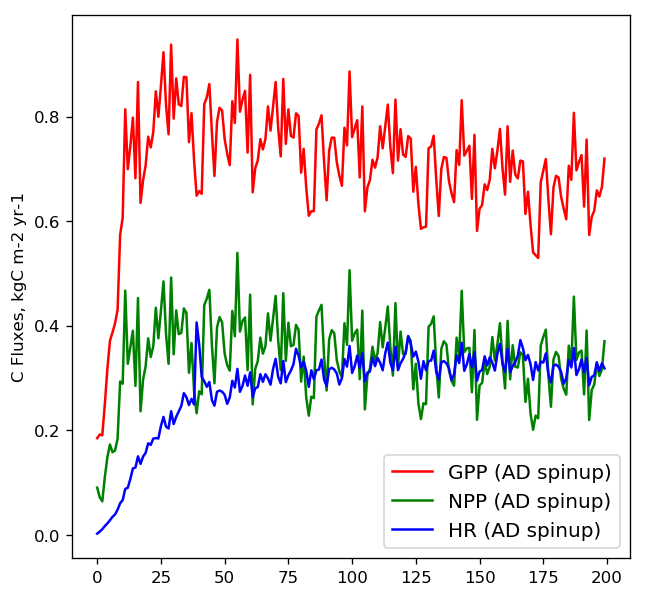

In [222]:
# Plot GPP, HR, gC m-2 
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_yr[:], 'r-')
plt.plot(yr_axis, dnpp_yr[:], 'g-')
plt.plot(yr_axis, drh_yr[:], 'b-')
plt.legend(['GPP (AD spinup)', 'NPP (AD spinup)','HR (AD spinup)'], fontsize = 12)
plt.ylabel('C Fluxes, kgC m-2 yr-1')

Text(0,0.5,'C Fluxes, kgC m-2 yr-1')

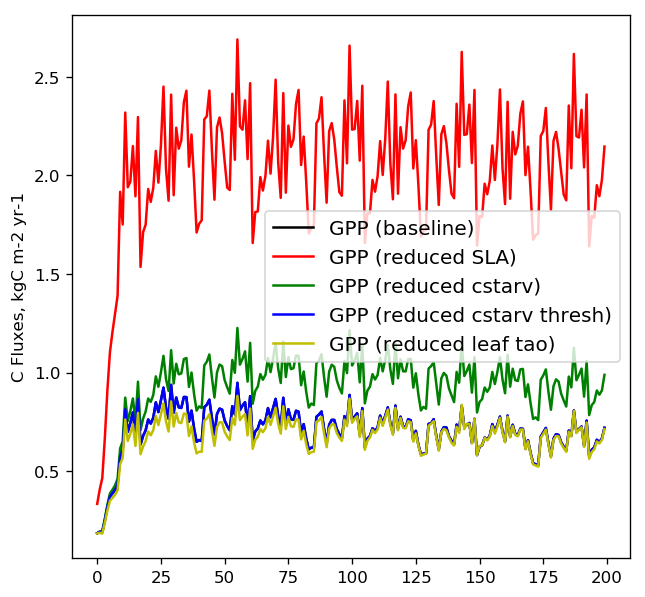

In [37]:
# Plot PPE GPP, gC m-2 
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_yr[:], 'k-')
plt.plot(yr_axis, dgpp_yr_sla[:], 'r-')
plt.plot(yr_axis, dgpp_yr_cstarv[:], 'g-')
plt.plot(yr_axis, dgpp_yr_cstarv_thresh[:], 'b-')
plt.plot(yr_axis, dgpp_yr_leaf_tao[:], 'y-')
plt.legend(['GPP (baseline)', 'GPP (reduced SLA)','GPP (reduced cstarv)', 'GPP (reduced cstarv thresh)', 'GPP (reduced leaf tao)'], fontsize = 12)
plt.ylabel('C Fluxes, kgC m-2 yr-1')

Text(0,0.5,'GPP, kgC m-2 yr-1')

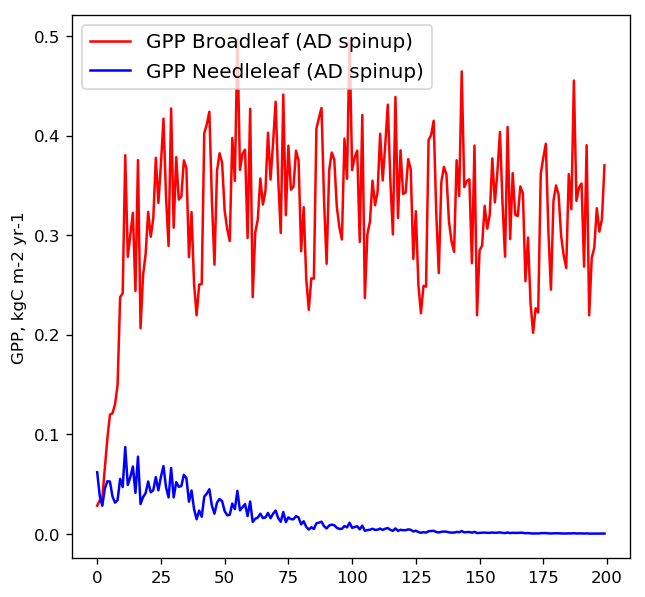

In [234]:
# GPP by PFT
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dnpp_pf_yr[:,0], 'r-')
plt.plot(yr_axis, dnpp_pf_yr[:,1], 'b-')
plt.legend(['GPP Broadleaf (AD spinup)', 'GPP Needleleaf (AD spinup)'], fontsize = 12)
plt.ylabel('GPP, kgC m-2 yr-1')

Text(0,0.5,'GPP, kgC m-2 yr-1')

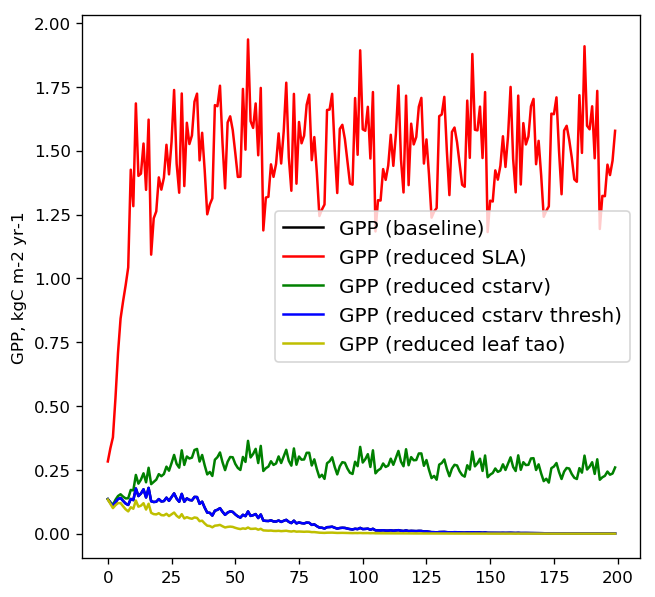

In [40]:
# PPE GPP of pine
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_pf_yr[:,1], 'k-')
plt.plot(yr_axis, dgpp_pf_yr_sla[:,1], 'r-')
plt.plot(yr_axis, dgpp_pf_yr_cstarv[:,1], 'g-')
plt.plot(yr_axis, dgpp_pf_yr_cstarv_thresh[:,1], 'b-')
plt.plot(yr_axis, dgpp_pf_yr_leaf_tao[:,1], 'y-')
plt.legend(['GPP (baseline)', 'GPP (reduced SLA)','GPP (reduced cstarv)', 'GPP (reduced cstarv thresh)', 'GPP (reduced leaf tao)'], fontsize = 12)
plt.ylabel('GPP, kgC m-2 yr-1')

Text(0,0.5,'C pool, kgC m-2')

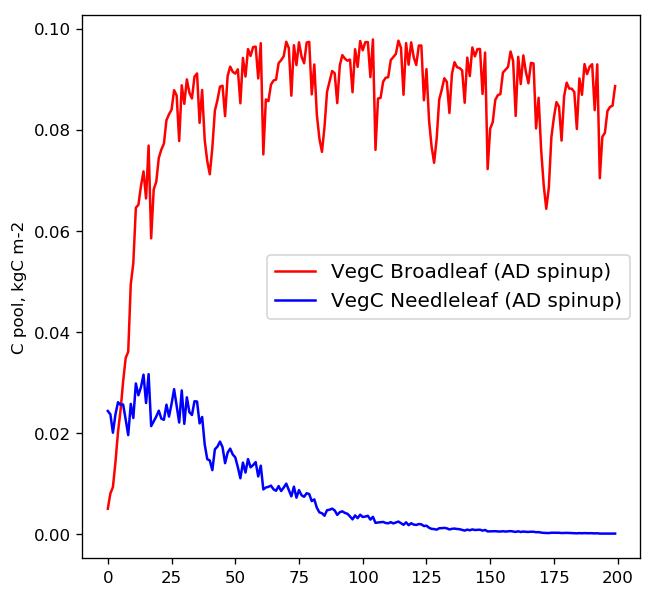

In [245]:
# VegC by PFT
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dstorec_pf_yr[:,0], 'r-')
plt.plot(yr_axis, dstorec_pf_yr[:,1], 'b-')
plt.legend(['VegC Broadleaf (AD spinup)', 'VegC Needleleaf (AD spinup)'], fontsize = 12)
plt.ylabel('C pool, kgC m-2')

In [28]:
dnp_pf_yr[20,1]

0.096079982817173

Text(0.5,1,'Plant #')

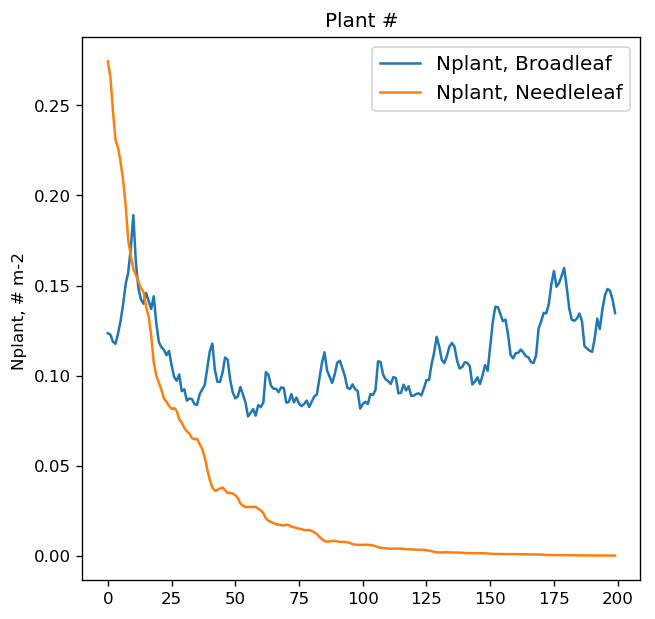

In [21]:
# Check Nplant for per PFT
yr_axis = np.arange(0, 200)
# dnp_diff = dnp_pf_yr[1:200,1] - dnp_pf_yr[0:199,1]
plot_len = len(yr_axis)
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dnp_pf_yr[:,0])
plt.plot(yr_axis, dnp_pf_yr[:,1])
# plt.plot(yr_axis, abs(dnp_diff[:]) - dmort_tot_yr[1:200,1]) 
# plt.plot(yr_axis, -dmort_tot_yr[0:199,1], 'c-')
plt.legend(['Nplant, Broadleaf', 'Nplant, Needleleaf'], fontsize = 12)
plt.ylabel('Nplant, # m-2 ')
plt.title('Plant #')

Text(0.5,1,'Plant #')

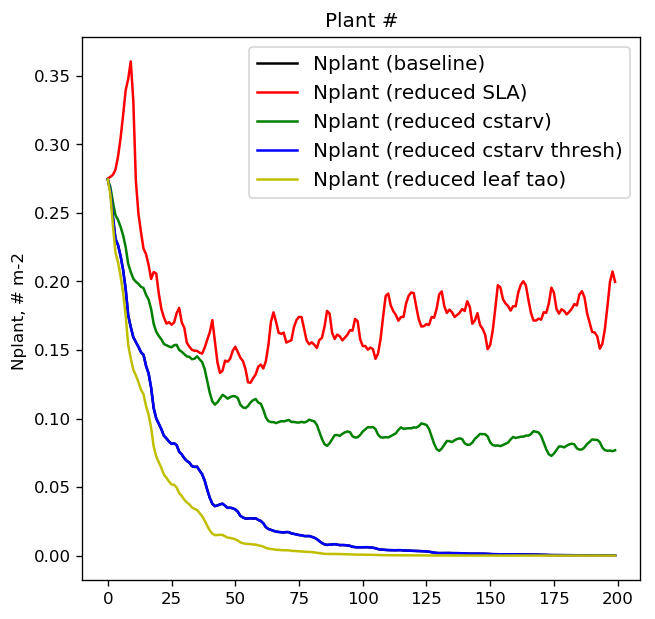

In [42]:
# Check Nplant for Needleleaf PPE
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dnp_pf_yr[:,1], 'k-')
plt.plot(yr_axis, dnp_pf_yr_sla[:,1], 'r-')
plt.plot(yr_axis, dnp_pf_yr_cstarv[:,1], 'g-')
plt.plot(yr_axis, dnp_pf_yr_cstarv_thresh[:,1], 'b-')
plt.plot(yr_axis, dnp_pf_yr_leaf_tao[:,1], 'y-')
plt.legend(['Nplant (baseline)', 'Nplant (reduced SLA)','Nplant (reduced cstarv)', 'Nplant (reduced cstarv thresh)', 'Nplant (reduced leaf tao)'], fontsize = 12)
plt.ylabel('Nplant, # m-2 ')
plt.title('Plant #')

Text(0,0.5,'Nplant, # m-2 yr-1')

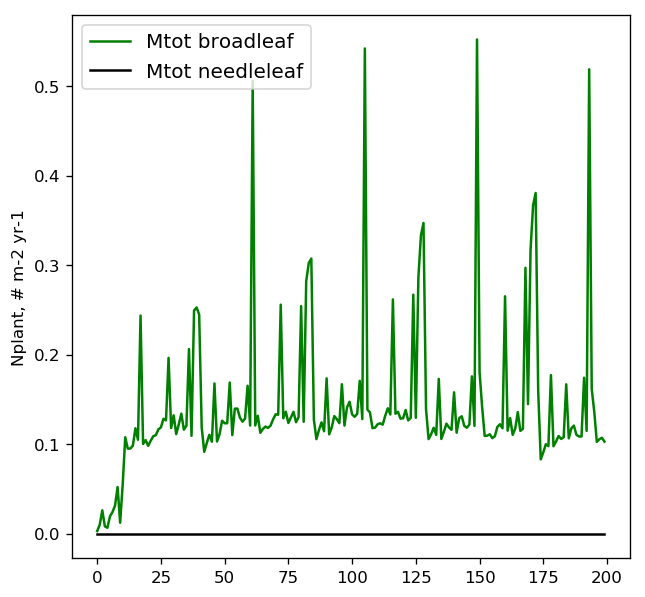

In [12]:
# Check mortality rates
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
fig = plt.figure(figsize=(6,6), dpi=120)
# plt.plot(yr_axis, dmort_age_yr[:])
# plt.plot(yr_axis, dmort_bg_yr[:])
# plt.plot(yr_axis, dmort_cst_yr[:,0])
# plt.plot(yr_axis, dmort_cst_yr[:,1])
# plt.plot(yr_axis, dmort_fire_yr[:])
# plt.plot(yr_axis, dmort_freeze_yr[:])
# plt.plot(yr_axis, dmort_hyd_yr[:,0])
# plt.plot(yr_axis, dmort_hyd_yr[:,1])
# plt.plot(yr_axis, dmort_imp_yr[:])
# plt.plot(yr_axis, dmort_sen_yr[:])
# plt.plot(yr_axis, dmort_term_yr[:])
# plt.plot(yr_axis, dmort_tot_yr[:,0], 'r-')
# plt.plot(yr_axis, dmort_tot_yr[:,1], 'b-')

# plt.plot(yr_axis, dmort_cst_yr[:,0], 'r-')
# plt.plot(yr_axis, dmort_cst_yr[:,1], 'b-')
plt.plot(yr_axis, dmort_tot_yr[:,0]*3600*24*365, 'g-')
plt.plot(yr_axis, dmort_tot_yr[:,1]*3600*24*365, 'k-')
# plt.plot(yr_axis, (dmort_cst_yr[:,0]*3600*24*365))#/(dmort_tot_yr[:,0]*3600*24*365))
# plt.plot(yr_axis, (dmort_cst_yr[:,1]*3600*24*365))#/(dmort_tot_yr[:,1]*3600*24*365))

# plt.plot(yr_axis, drec_yr[:,0], 'g-')
# plt.plot(yr_axis, drec_yr[:,1], 'k-')

plt.legend(['Mtot broadleaf', 'Mtot needleleaf'], fontsize = 12)
plt.ylabel('Nplant, # m-2 yr-1')

Text(0,0.5,'Nplant, # m-2 yr-1')

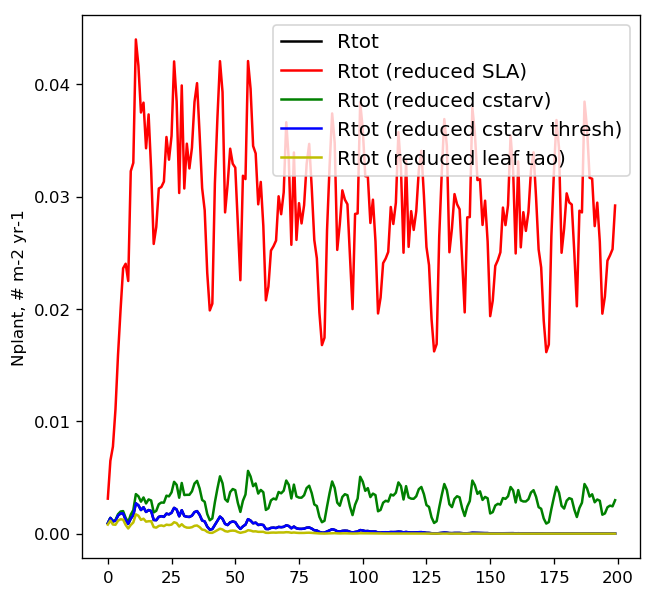

In [45]:
# Check mortality/recruitment rates PPE
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
fig = plt.figure(figsize=(6,6), dpi=120)

# plt.plot(yr_axis, dmort_tot_yr[:,1], 'k-')
# plt.plot(yr_axis, dmort_tot_yr_sla[:,1], 'r-')
# plt.plot(yr_axis, dmort_tot_yr_cstarv[:,1], 'g-')
# plt.plot(yr_axis, dmort_tot_yr_cstarv_thresh[:,1], 'b-')
# plt.plot(yr_axis, dmort_tot_yr_leaf_tao[:,1], 'y-')

plt.plot(yr_axis, drec_yr[:,1], 'k-')
plt.plot(yr_axis, drec_yr_sla[:,1], 'r-')
plt.plot(yr_axis, drec_yr_cstarv[:,1], 'g-')
plt.plot(yr_axis, drec_yr_cstarv_thresh[:,1], 'b-')
plt.plot(yr_axis, drec_yr_leaf_tao[:,1], 'y-')

plt.legend(['Rtot', 'Rtot (reduced SLA)', 'Rtot (reduced cstarv)', 'Rtot (reduced cstarv thresh)', 'Rtot (reduced leaf tao)'], fontsize = 12)
plt.ylabel('Nplant, # m-2 yr-1')

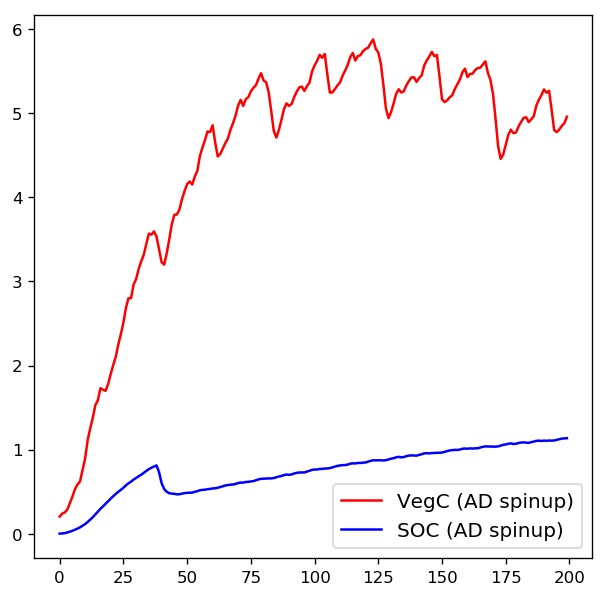

In [226]:
# Plot VegC, SOC, kgC 
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dvegc_yr[:], 'r-')
plt.plot(yr_axis, dsoilc_yr[:], 'b-')
plt.legend(['VegC (AD spinup)', 'SOC (AD spinup)'], fontsize = 12)

In [189]:
# Normal spinup stage
dtc = nc4.Dataset(fsp)
dgpp = dtc['FATES_GPP'][:]
drh = dtc['HR'][:]
dvegc = dtc['FATES_VEGC'][:]
dsoilc = dtc['TOTSOMC_1m'][:]
dtc.close()


In [192]:
# Convert GPP from day to year
dgpp_yr = np.zeros((70))
drh_yr = np.zeros((70))
dvegc_yr = np.zeros((70))
dsoilc_yr = np.zeros((70))
for i in np.arange(0,70):
    dgpp_yr[i] = np.nanmean(dgpp[12*i:12*i+12])*3600.0*24.0*365.0
    drh_yr[i] = np.nanmean(drh[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3

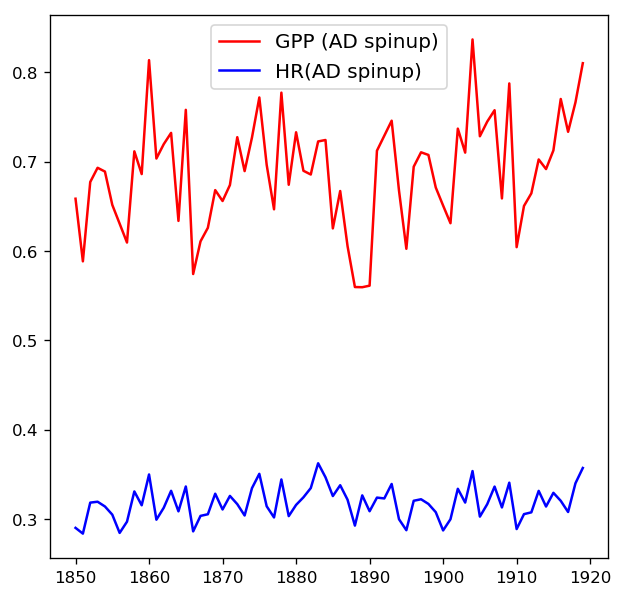

In [194]:
# Plot GPP, HR, gC m-2 
yr_axis = np.arange(1850, 1920)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_yr[:], 'r-')
plt.plot(yr_axis, drh_yr[:], 'b-')

plt.legend(['GPP (Normal spinup)', 'HR(Normal spinup)'], fontsize = 12)


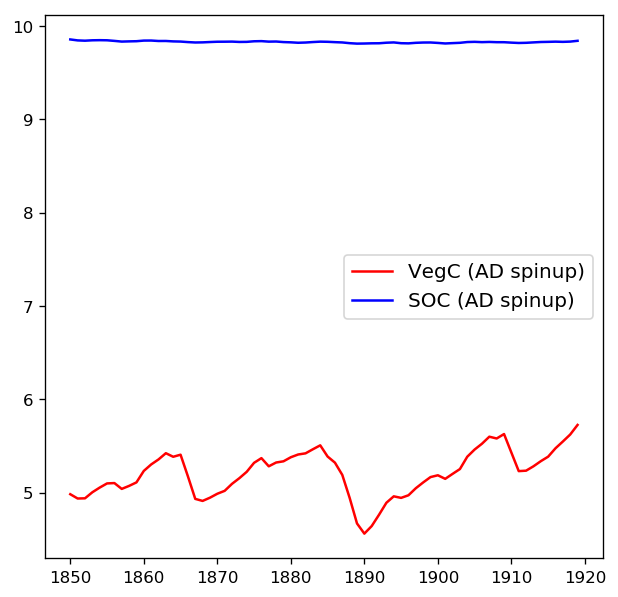

In [197]:
# Plot VegC, SOC, kgC 
yr_axis = np.arange(1850, 1920)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dvegc_yr[:], 'r-')
plt.plot(yr_axis, dsoilc_yr[:], 'b-')
# plt.ylim([0, 50])
plt.legend(['VegC (AD spinup)', 'SOC (AD spinup)'], fontsize = 12)

### Logging activity and age distribution

In [169]:
# Logging activity
dtc = nc4.Dataset(flg)
darea_ap = dtc['FATES_SECONDAREA_ANTHRODIST_AP'][:]
# darea_ap = dtc['FATES_SECONDAREA_DIST_AP'][:]
ddis_p2p = dtc['FATES_DISTURBANCE_RATE_P2P'][:]
ddis_p2s = dtc['FATES_DISTURBANCE_RATE_P2S'][:]
ddis_s2s = dtc['FATES_DISTURBANCE_RATE_S2S'][:]
dcarea_ap = dtc['FATES_CANOPYAREA_AP'][:]
dsoilc = dtc['SOILC'][:]
dvegc = dtc['FATES_VEGC'][:]
dpatch = dtc['FATES_NOCOMP_NPATCHES_PF'][:]
dpatch_sec = dtc['FATES_NPATCHES_SECONDARY'][:]
dnp_sz = dtc['FATES_NPLANT_SZ'][:]
dtc.close()


In [118]:
# Convert GPP from day to year
darea_ap_yr = np.zeros((65, 7))
dcarea_ap_yr = np.zeros((65, 7))
dsoilc_yr = np.zeros((65))
dvegc_yr = np.zeros((65))
dpatch_yr = np.zeros((65))
dpatch_sec_yr = np.zeros((65))
for i in np.arange(0,65):
#     darea_ap_yr[i] = np.nanmean(darea_ap[12*i:12*i+12, :, 0], 0)
    darea_ap_yr[i] = darea_ap[12*i+11, :, 0]
    dcarea_ap_yr[i] = np.nanmean(dcarea_ap[12*i:12*i+12, :, 0], 0)
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3
    dpatch_yr[i] = dpatch[12*i+11, 3, 0]
    dpatch_sec_yr[i] = dpatch_sec[12*i+11, 0]

Text(0.5,1,'Stacked plot of secondary forest area')

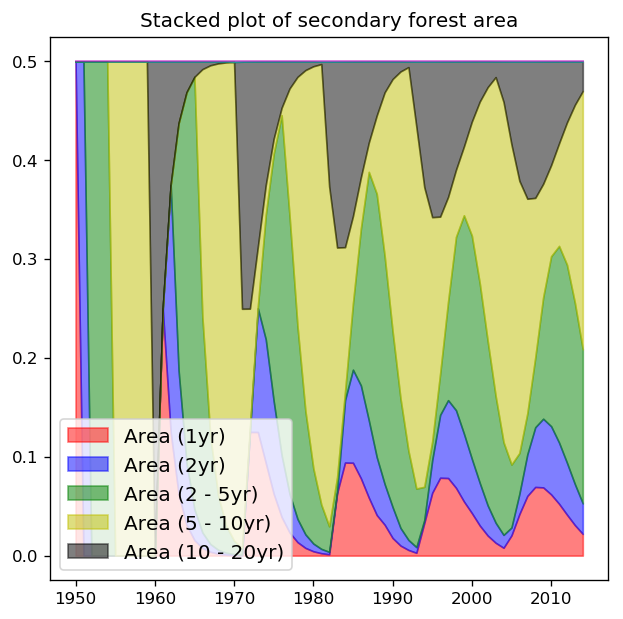

In [119]:
# Plot area change with time 
yr_axis = np.arange(1950, 2015)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin

c = ['r', 'b', 'g', 'y', 'k', 'c', 'm']
y = np.zeros((len(yr_axis)))
# darea_ap_yr_acc = np.zeros(np.shape(darea_ap_yr))
# for i in range(7):
#     if(i == 0):  
#         darea_ap_yr_acc[:,i] = 
# darea_ap_yr_acc = 
fig, ax = plt.subplots(figsize=(6,6), dpi=120)
for i in range(7):
    r = darea_ap_yr[:,i]
    if(i == 0):
        yp = np.zeros((len(yr_axis)))
    else:
        yp = yp + np.copy(darea_ap_yr[:,i-1])
    y = y + r
    ax.fill_between(yr_axis, yp, y, color=c[i], alpha=0.5)

# fig = plt.figure(figsize=(6,6), dpi=120)
# plt.plot(yr_axis, darea_ap_yr[:,0])
# plt.plot(yr_axis, darea_ap_yr[:,1])
# plt.plot(yr_axis, darea_ap_yr[:,2])
# plt.plot(yr_axis, darea_ap_yr[:,3])
# plt.plot(yr_axis, darea_ap_yr[:,4])
# plt.plot(yr_axis, darea_ap_yr[:,5])
# plt.plot(yr_axis, darea_ap_yr[:,6])
plt.legend(['Area (1yr)', 'Area (2yr)', 'Area (2 - 5yr)', 'Area (5 - 10yr)', 'Area (10 - 20yr)'], fontsize = 12, loc='lower left')
plt.title('Stacked plot of secondary forest area')

In [87]:
np.shape(dpatch_sec_yr)

(65L,)

Text(0.5,1,'Patch number')

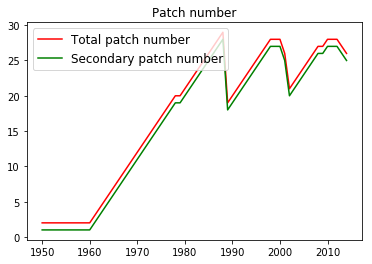

In [120]:
plt.plot(yr_axis, dpatch_yr, 'r-')
plt.plot(yr_axis, dpatch_sec_yr, 'g-')
plt.legend(['Total patch number', 'Secondary patch number'], fontsize = 12, loc='upper left')
plt.title('Patch number')

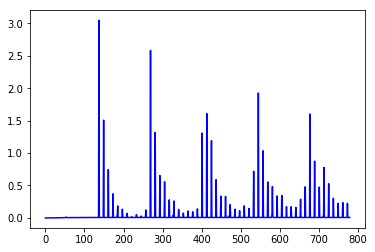

In [82]:
# plt.plot(ddis_p2p, 'r-')
# plt.plot(ddis_p2s, 'g-')
plt.plot(ddis_s2s, 'b-')

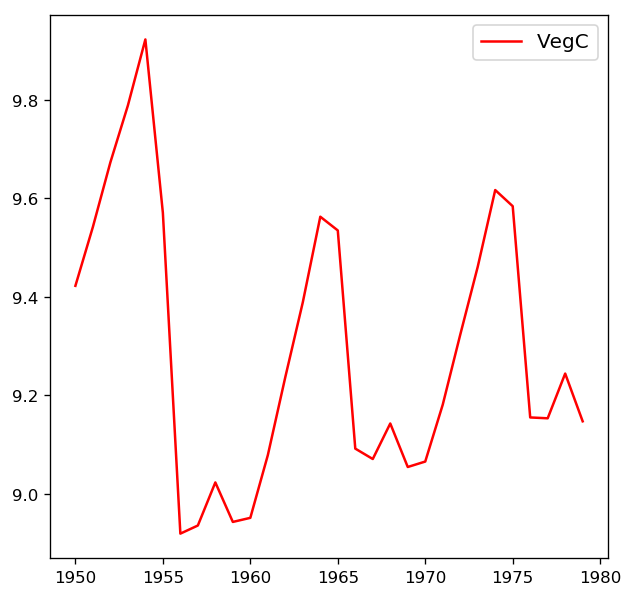

In [11]:
# Plot area change with time 
yr_axis = np.arange(1950, 1980)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dvegc_yr[:], 'r-')
# plt.plot(yr_axis, dsoilc_yr[:], 'b-')
plt.legend(['VegC'], fontsize = 12)
# plt.ylim([116, 116.5])

### Other bias correction if needed?

### Generate parameters for sensitivity test

In [3]:
vcmax = np.array([50, 62, 39, 61, 58, 58, 62, 54, 54, 78, 78, 78])

In [5]:
vcmax*1.33

array([ 66.5 ,  82.46,  51.87,  81.13,  77.14,  77.14,  82.46,  71.82,
        71.82, 103.74, 103.74, 103.74])

In [7]:
6.619429e-08*3600*24*365

2.08750312944

### Examine equations

In [32]:
slatop = 0.008
leafc = 1400
dsladlai = 0.003

In [23]:
tlai = slatop * leafc

In [36]:
tlai = (slatop*(np.exp(leafc*dsladlai) - 1.0))/dsladlai

In [37]:
tlai

175.16354944246706

In [38]:
np.exp(leafc*dsladlai)

66.68633104092515

In [48]:
0.0001*1.3

0.00013000000000000002

In [61]:
GPP_b = np.array([4.316635e-08, 3.077799e-08, 5.646213e-08, 5.968632e-08, 8.061078e-08, 8.467397e-08, 8.604534e-08, 8.172755e-08, 6.962809e-08, 3.276739e-08, 6.171467e-08, 6.128839e-08])
GPP_lvmax = np.array([3.25679e-08, 1.253685e-08, 4.016154e-08, 4.242434e-08, 5.471846e-08, 6.500584e-08, 6.608105e-08, 6.281361e-08, 6.036433e-08, 5.517969e-08, 5.022973e-08, 4.77478e-08])
GPP_lvmin = np.array([4.60232e-08, 3.042196e-08, 6.703232e-08, 6.925708e-08, 9.613236e-08, 1.003607e-07, 1.023933e-07, 5.588752e-08, 8.754043e-08, 8.531604e-08, 7.735814e-08, 7.319431e-08])
GPP_pmax = np.array([5.122403e-08, 3.26454e-08, 3.7079e-08, 5.80951e-08, 8.665239e-08, 8.557011e-08, 8.64726e-08, 8.599957e-08, 7.908132e-08, 7.414199e-08, 6.820623e-08, 3.524194e-08 ])
GPP_pmin = np.array([1.097617e-08, 4.658826e-09, 9.401082e-09, 4.462757e-08, 7.765843e-08, 7.958646e-08, 7.938134e-08, 7.642441e-08, 6.620563e-08, 6.783215e-08, 5.225028e-08, 1.206812e-08 ])
GPP_tmax = np.array([3.871994e-08, 1.581929e-08, 1.665987e-08, 3.616694e-08, 5.428254e-08, 8.80536e-08, 9.163911e-08, 9.05553e-08, 8.472693e-08, 7.878379e-08, 7.222104e-08, 5.256139e-08])
GPP = np.array([4.463966e-08, 2.960538e-08, 2.728594e-08, 2.503379e-08, 7.404063e-08, 7.568412e-08, 7.683906e-08, 7.664119e-08, 6.971889e-08, 6.563198e-08, 6.268495e-08, 5.238375e-08])
dom = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
GPP_yr = np.sum(GPP * dom * 3600 * 24)

In [62]:
GPP_yr

1.79400369456